In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [2]:
# reading the dataset
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Get useful information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<AxesSubplot:>

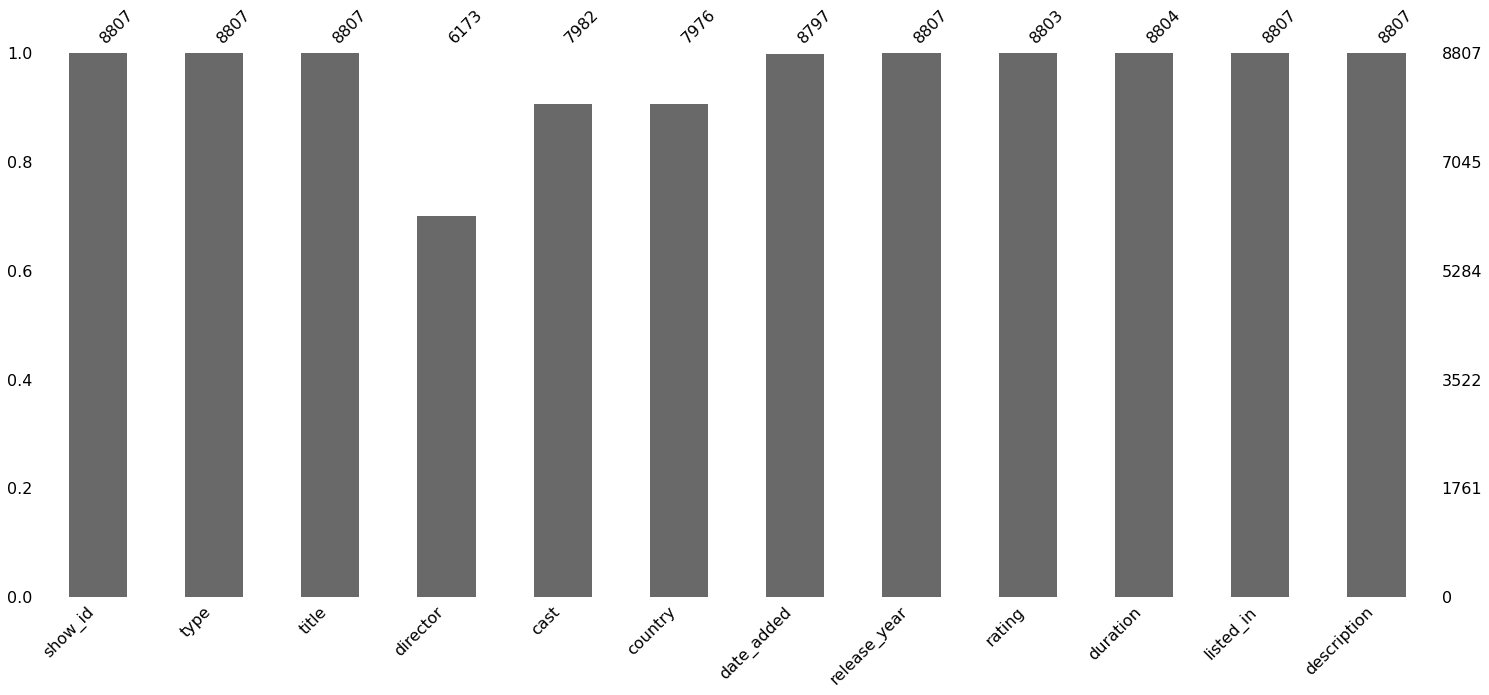

In [6]:
# plotting graph for the missing values
msn.bar(df)

### Above plot shows the missing values

In [8]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [9]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [10]:
df['release_year'].sort_values().unique()

array([1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [11]:
df.shape

(8807, 12)

#### Dropping rows which are containing time in rating

In [12]:
df.drop(df.index[df['rating']=='84 min'],inplace=True)
df.drop(df.index[df['rating']=='66 min'],inplace=True)
df.drop(df.index[df['rating']=='74 min'],inplace=True)
df.shape

(8804, 12)

In [ ]:
df

In [14]:
pd.set_option('display.max_rows',5000)

In [520]:
df['release_year'].value_counts().head(6)

2018    1147
2017    1031
2019    1030
2020     953
2016     902
2021     592
Name: release_year, dtype: int64

In [16]:
sum(df[df['release_year']<=2015].value_counts())

2328

In [17]:
sum(df[df['release_year']>2015].value_counts())

3004

In [19]:
print(df['release_year'].min(),'-',df['release_year'].max())

1925 - 2021


In [20]:
print('Movies released after 2015 : ',sum(df[(df['release_year']>2015) & (df['type']=='Movie')].value_counts()))
print('TV Show released after 2015 : ',sum(df[(df['release_year']>2015) & (df['type']=='TV Show')].value_counts()))

Movies released after 2015 :  2889
TV Show released after 2015 :  115


In [21]:
print('Movies released till 2015 : ',sum(df[(df['release_year']<=2015) & (df['type']=='Movie')].value_counts()))
print('TV Show released till 2015 : ',sum(df[(df['release_year']<=2015) & (df['type']=='TV Show')].value_counts()))

Movies released till 2015 :  2296
TV Show released till 2015 :  32


In [22]:
print('Movie : ',sum(df['type']=='Movie'),'|','TV Show : ',sum(df['type']=='TV Show'))

Movie :  6128 | TV Show :  2676


In [466]:
df_era2=df[df["release_year"]>2015]
df_era2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<AxesSubplot:xlabel='release_year', ylabel='count'>

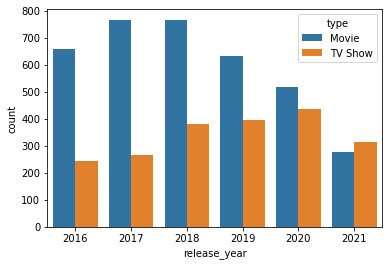

In [470]:
sns.countplot(data=df_era2,x='release_year',hue='type')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

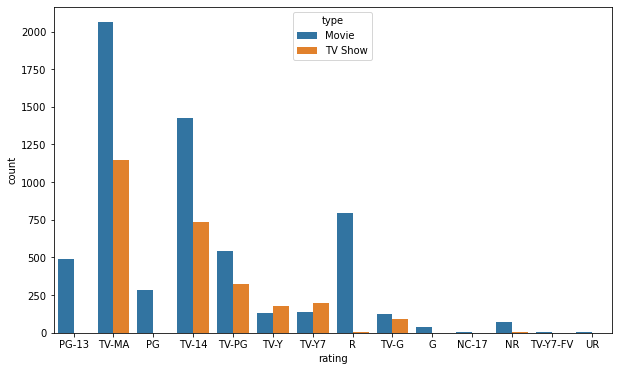

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(df['rating'],hue=df['type'])

# Finding the country data for Movies and TV Show.
### There are movies and TV Shows which are released in multiple countries so we have split and find the data for each country

In [525]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [526]:
df_country=df[["country","type"]].value_counts().to_frame().reset_index()
df_country.head(3)

,country,type,0
0,United States,Movie,2055
1,India,Movie,893
2,United States,TV Show,760


In [527]:
df_country.rename(columns={0:"count"},inplace=True)
df_country.head()

,country,type,count
0,United States,Movie,2055
1,India,Movie,893
2,United States,TV Show,760
3,United Kingdom,TV Show,213
4,United Kingdom,Movie,206


In [528]:
df_country.pivot(index="country",
                  columns="type",
                   values="count"
                  ).head()

type,Movie,TV Show
country,,
", France, Algeria",1.0,NaN
", South Korea",NaN,1.0
Argentina,38.0,18.0
"Argentina, Brazil, France, Poland, Germany, Denmark",1.0,NaN
"Argentina, Chile",2.0,NaN


In [529]:
df_country['country']=df_country['country'].apply(lambda x:str(x).split(','))
df_country.head()

,country,type,count
0,[United States],Movie,2055
1,[India],Movie,893
2,[United States],TV Show,760
3,[United Kingdom],TV Show,213
4,[United Kingdom],Movie,206


In [530]:
df_country_1=df_country.explode('country')

In [531]:
df_country_1.head()

,country,type,count
0,United States,Movie,2055
1,India,Movie,893
2,United States,TV Show,760
3,United Kingdom,TV Show,213
4,United Kingdom,Movie,206


In [532]:
df_country_2=df_country_1.drop_duplicates()
df_country_2.reset_index(drop=True,inplace=True)

In [533]:
df_country_2.head()

,country,type,count
0,United States,Movie,2055
1,India,Movie,893
2,United States,TV Show,760
3,United Kingdom,TV Show,213
4,United Kingdom,Movie,206


In [534]:
df_cwise=df_country_2.groupby(['country','type']).sum()
df_cwise.head()

count
country      type          
             Movie        3
             TV Show      1
 Afghanistan Movie        1
 Albania     Movie        1
 Algeria     Movie        1

### From the above tabl we can see how many movies and tv shows released per country

In [536]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [537]:
df_timewise=df.copy()

In [538]:
df_timewise.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [539]:
df_timewise['month']=pd.to_datetime(df_timewise['date_added']).dt.month_name()

In [541]:
df_timewise.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September


<AxesSubplot:xlabel='month', ylabel='count'>

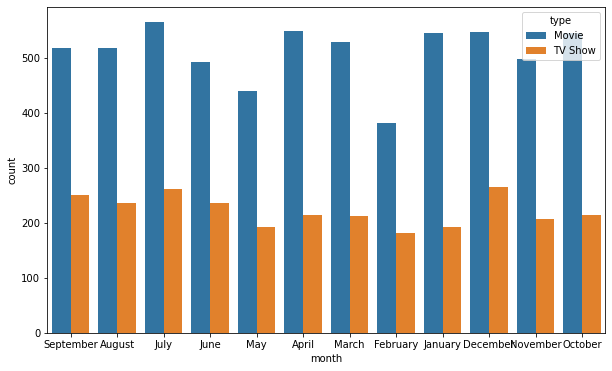

In [472]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_timewise,x="month",hue='type')

In [542]:
df_2015=df_timewise[df_timewise['release_year']>2015]

<AxesSubplot:xlabel='month', ylabel='count'>

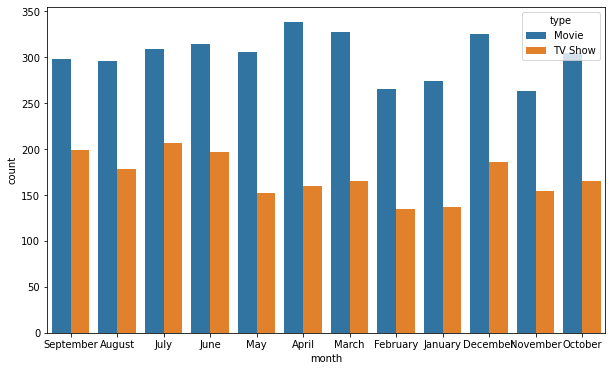

In [543]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_2015,x="month",hue='type')

### Plot showing how many movies adn TV Shows released after 2015 month wise.

In [544]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [545]:
df_dir=df.copy()

In [546]:
#  Separate dataset to analyse the director column
df_dir=df_dir.dropna(subset=['director'])

In [547]:
df_dir.reset_index(inplace=True)
df_dir.head(3)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [306]:
df_dir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170 entries, 0 to 6169
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6170 non-null   object
 1   type          6170 non-null   object
 2   title         6170 non-null   object
 3   director      6170 non-null   object
 4   cast          5697 non-null   object
 5   country       5748 non-null   object
 6   date_added    6170 non-null   object
 7   release_year  6170 non-null   int64 
 8   rating        6169 non-null   object
 9   duration      6170 non-null   object
 10  listed_in     6170 non-null   object
 11  description   6170 non-null   object
dtypes: int64(1), object(11)
memory usage: 578.6+ KB


In [548]:
df_dir.drop('index',axis=1,inplace=True)

In [549]:
df_dir.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [550]:
df_dir['director']=df_dir['director'].apply(lambda x:str(x).split(','))

In [551]:
df_dir.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s3,TV Show,Ganglands,[Julien Leclercq],"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s6,TV Show,Midnight Mass,[Mike Flanagan],"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
3,s7,Movie,My Little Pony: A New Generation,"[Robert Cullen, José Luis Ucha]","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
4,s8,Movie,Sankofa,[Haile Gerima],"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [552]:
df_dir1=df_dir.explode('director')

In [553]:
df_dir1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
3,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
3,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [554]:
df_dir=(df_dir1[['director','type','country']].value_counts()).to_frame()

In [555]:
df_dir.rename(columns={0:'count'},inplace=True)

In [556]:
df_dir.head()

,,,count
director,type,country,
Jay Karas,Movie,United States,15
Marcus Raboy,Movie,United States,14
Cathy Garcia-Molina,Movie,Philippines,13
Jay Chapman,Movie,United States,12
Shannon Hartman,Movie,United States,9


### Above table shows that the no. of movies or TV shows directed by director

In [558]:
df_list=df.copy()

In [559]:
df_list['listed_in']=df_list['listed_in'].apply(lambda x:str(x).split(','))
df_list.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...


In [560]:
df_list=df_list.explode('listed_in')
df_list.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."


In [561]:
df_list["listed_in"].nunique()

73

In [562]:
df_list["listed_in"].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [563]:
df_list["listed_in"].value_counts().head(10)

 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: listed_in, dtype: int64

### About data shows the count of movies according to genre 

In [565]:
df_avg_movie_time=df[df['duration'].str.contains('min')]

In [566]:
df_avg_movie_time.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [567]:
df_avg_movie_time=df_avg_movie_time['duration'].to_frame()

In [568]:
df_avg_movie_time['duration']=df_avg_movie_time['duration'].apply(lambda x:str(x).split(' '))
df_avg_movie_time.head()

,duration
0,"[90, min]"
6,"[91, min]"
7,"[125, min]"
9,"[104, min]"
12,"[127, min]"


In [569]:
df_avg_movie_time['duration']=df_avg_movie_time['duration'].apply(lambda x:int(x[0]))
df_avg_movie_time.head(7)

,duration
0,90
6,91
7,125
9,104
12,127
13,91
16,67


In [419]:
df_avg_movie_time.describe()

,duration
count,6128.000000
mean,99.577187
std,28.290593
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


##### Above table shows the information about the timings of the movie.
avg. time for movies is 99 min.

In [570]:
df_cast=df.copy()

In [571]:
df_cast['cast']=df_cast['cast'].apply(lambda x:str(x).split(','))

In [572]:
df_cast.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[nan],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [573]:
df_cast=df_cast.explode('cast')

In [574]:
df_cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [575]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64948 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       64948 non-null  object
 1   type          64948 non-null  object
 2   title         64948 non-null  object
 3   director      45935 non-null  object
 4   cast          64948 non-null  object
 5   country       59895 non-null  object
 6   date_added    64879 non-null  object
 7   release_year  64948 non-null  int64 
 8   rating        64910 non-null  object
 9   duration      64948 non-null  object
 10  listed_in     64948 non-null  object
 11  description   64948 non-null  object
dtypes: int64(1), object(11)
memory usage: 6.4+ MB


In [576]:
df_cast['cast'].nunique()

39296

In [577]:
df_cast['cast'].value_counts().head()

nan                  825
 Anupam Kher          39
 Rupa Bhimani         31
 Takahiro Sakurai     30
 Julie Tejwani        28
Name: cast, dtype: int64

In [578]:
df_cast['cast'].replace('nan',np.nan,inplace=True)

In [579]:
df_cast.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [580]:
df_cast=df_cast.dropna(subset=['cast'])

In [581]:
df_cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [582]:
df_cas=df_cast.groupby(['country','cast','listed_in'])['cast'].count().to_frame()
df_cas

cast
country           cast                listed_in                                             
, France, Algeria  Areen Omari        Dramas, Independent Movies, International Movies     1
                   Maisa Abd Elhadi   Dramas, Independent Movies, International Movies     1
                   Malak Ermileh      Dramas, Independent Movies, International Movies     1
                   Nisreen Faour      Dramas, Independent Movies, International Movies     1
                   Souad Massi        Dramas, Independent Movies, International Movies     1
...                                                                                      ...
Zimbabwe           Kudzai Sevenzo     Comedies, International Movies, Romantic Movies      1
                   Michael Kudakwashe Comedies, International Movies, Romantic Movies      1
                   Tendai Nguni       Comedies, International Movies, Romantic Movies      1
                   Zihlo              Comedies, International Movies, Romantic Movies      1
                  Tendaiishe Chitima  Comedies, International Movies, Romantic Movies      1

[55319 rows x 1 columns]

In [583]:
df_cas.loc['India'].head()

cast
cast             listed_in                                             
 A.K. Hangal     Action & Adventure, Dramas, International Movies     1
                 Classic Movies, Comedies, Dramas                     1
                 Comedies, International Movies, Music & Musicals     1
                 Dramas, Independent Movies, International Movies     1
 A.S. Sasi Kumar Dramas, Independent Movies, International Movies     1

### Above table shows the list of artist according to country collectively and we can select the artist with their stats.

In [584]:
df_tv=df[df['type']=='TV Show']

In [585]:
df_tv.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [586]:
df_tv['duration']=df_tv['duration'].apply(lambda x:str(x).split(' '))

C:\Users\hp\AppData\Local\Temp\ipykernel_7956\1438972902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration']=df_tv['duration'].apply(lambda x:str(x).split(' '))


In [587]:
df_tv.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"[2, Seasons]","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,"[1, Season]","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [588]:
df_tv['duration']=df_tv['duration'].apply(lambda x:int(x[0]))

C:\Users\hp\AppData\Local\Temp\ipykernel_7956\4148963709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration']=df_tv['duration'].apply(lambda x:int(x[0]))


In [589]:
df_tv["duration"].mean()

1.764947683109118

# -----------------------------------------------Thanks-------------------------------------------------